In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# !pip install music21 

In [4]:
from music21 import stream, layout, clef, note
import click
import re
import numpy as np
import pandas as pd

In [ ]:
# 最初の音を決める
# ６限のE3〜D４までの間のC majerの音から選ぶ
# 2oct + 1.5音の範囲の一番高いC majerの音名を上限とする

In [44]:
# 6弦の7音からスタートする音を決める
notes = {n:i for i, n in  enumerate(["E","F","G","A","B","C","D"])}

major_scale_startE = [0, 1, 2, 2, 2, 1, 2]
E3 = 52   # 6弦0フレット

target_notes1 = np.cumsum(major_scale_startE) + E3
target_notes2 = np.cumsum(major_scale_startE) + E3 + 12
target_notes3 = np.cumsum(major_scale_startE) + E3 + 24
target_notes4 = np.cumsum(major_scale_startE) + E3 + 36

target_notes = np.concatenate([target_notes1, target_notes2, target_notes3, target_notes4])
target_notes

array([52, 53, 55, 57, 59, 60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 77, 79,
       81, 83, 84, 86, 88, 89, 91, 93, 95, 96, 98])

EFGABCDのどれかのアルファベットを入力してください[6弦のCメジャースケールから1つ音を指定]: F
F 1
71    9
72    9
55    9
65    9
67    9
77    9
62    8
69    8
53    8
79    8
57    8
64    8
59    7
60    7
76    6
74    6
dtype: int64


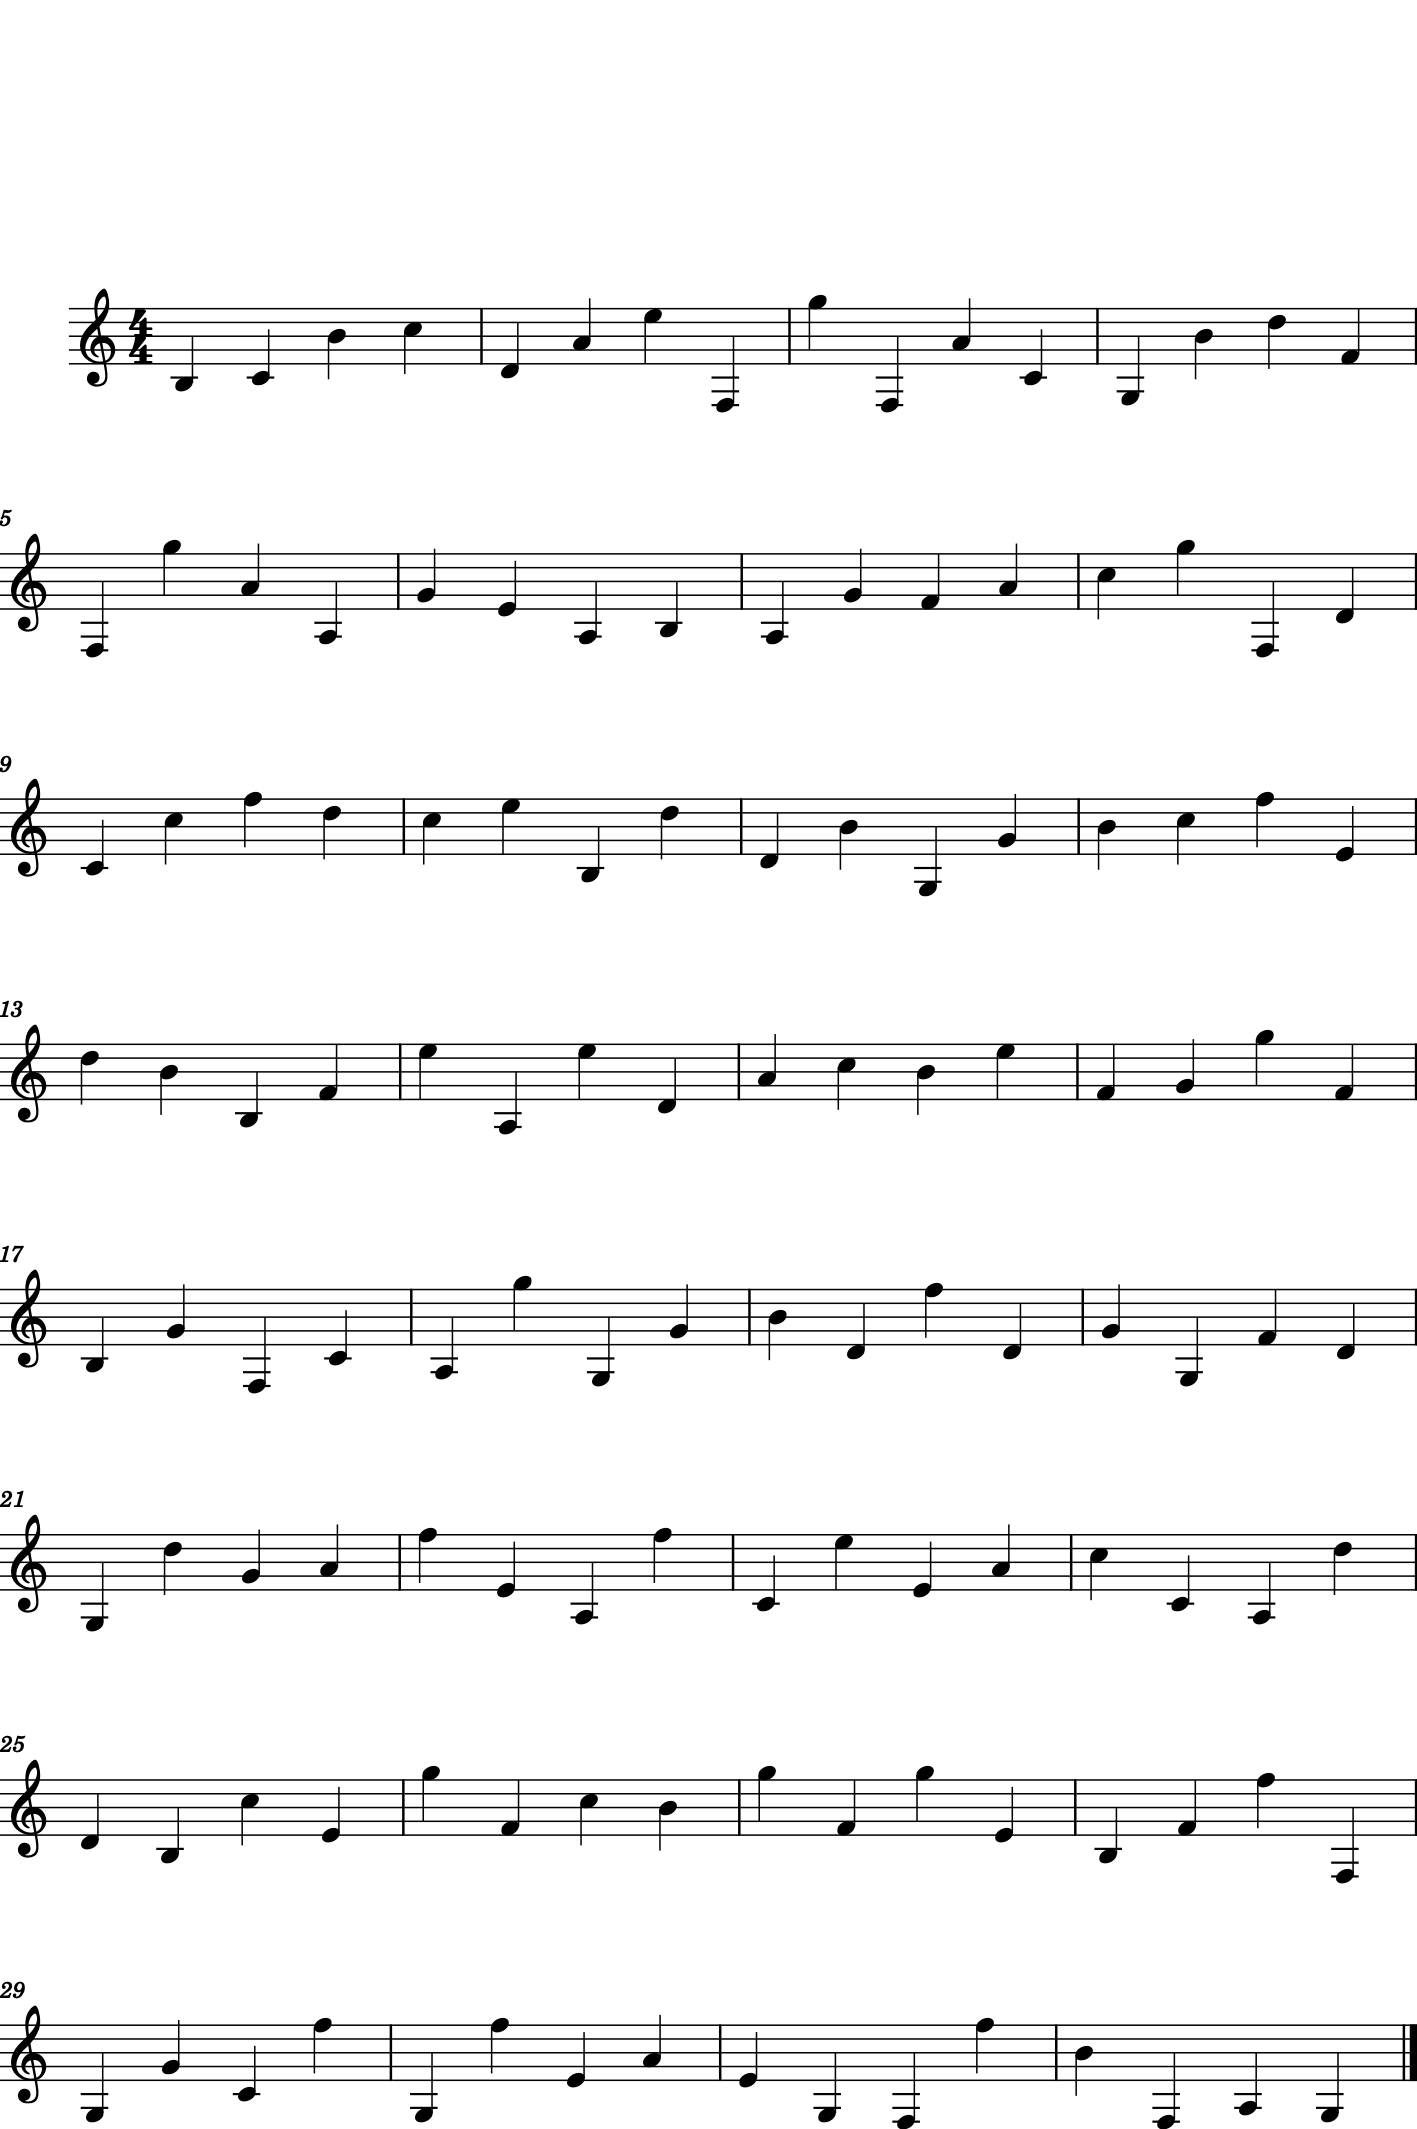

In [104]:
string = click.prompt('EFGABCDのどれかのアルファベットを入力してください[6弦のCメジャースケールから1つ音を指定]')
validateion = re.fullmatch(r"[EFGABCD]", string)
if validateion is None:
    print(f"[ERROR] EFGABCDのどれかのアルファベットを入力してください。入力された文字：{string}")
else:
    print(string, notes[string], )
    start_idx = notes[string]
    end_note = target_notes1[start_idx] + 24 + 3  # 2oct + 1.5音
    target_notes_s = target_notes[start_idx:]
    
    # print([note.Note(n, type='quarter') for n in target_notes_s[target_notes_s <= end_note]])
    target_notes_select = target_notes_s[target_notes_s <= end_note]
    
    disp_note_num = 128
    
    while True:
        n_notes = len(target_notes_select)
        result = np.random.randint(0, n_notes, (disp_note_num*2))
        target_notes_ext =[target_notes_select[i] for i in result]
        
        target_notes_ext = np.array(target_notes_ext)
        diffs = np.diff(target_notes_ext)
        diffs = np.insert(diffs, 0, 1)
        target_notes_ext_uniq = target_notes_ext[diffs != 0]
        
        balance_check = pd.Series(target_notes_ext_uniq[:disp_note_num]).value_counts()
        if balance_check.max() - balance_check.min() < 4:
            break
        else:
            pass
            # print("-", end="")
            #print(balance_check)
    
    print(balance_check)
    
melody = stream.Stream()

# ト音記号をセット
melody.insert(0, clef.TrebleClef())

for n in target_notes_ext_uniq[:disp_note_num]:
    nn = note.Note(n, type='quarter')
    nn.pitch.accidental = None   # なぜか２小節以降にナチュラル記号がついてしまうので非表示にする
    melody.append(nn)

for ii in range(disp_note_num // 16):   # 4分音符１６個で折り返し
    sb = layout.SystemLayout(isNew=True) 
    melody.insert(16*ii, sb)

melody.show()